=== AAPL Summary ===
                                Date          Open          High  \
count                          10998  10998.000000  10998.000000   
mean   2002-09-26 14:14:28.085106304     22.299160     22.539055   
min              1980-12-12 00:00:00      0.049665      0.049665   
25%              1991-10-28 06:00:00      0.299107      0.303710   
50%              2002-09-23 12:00:00      0.531250      0.537946   
75%              2013-08-25 06:00:00     20.204196     20.389554   
max              2024-07-30 00:00:00    236.479996    237.229996   
std                              NaN     46.003685     46.496031   

                Low         Close     Adj Close        Volume     Dividends  \
count  10998.000000  10998.000000  10998.000000  1.099800e+04  10998.000000   
mean      22.068367     22.312754     21.494496  3.180806e+08      0.000752   
min        0.049107      0.049107      0.037857  0.000000e+00      0.000000   
25%        0.290179      0.298549      0.241840  1

c:\Users\soswo\OneDrive\Desktop\projects\Predicting-Price-Moves-with-News-Sentiment\src\news.py:13: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  self.df["date"] = pd.to_datetime(self.df["date"], format='mixed', errors='coerce')



=== Headline Length Stats ===
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


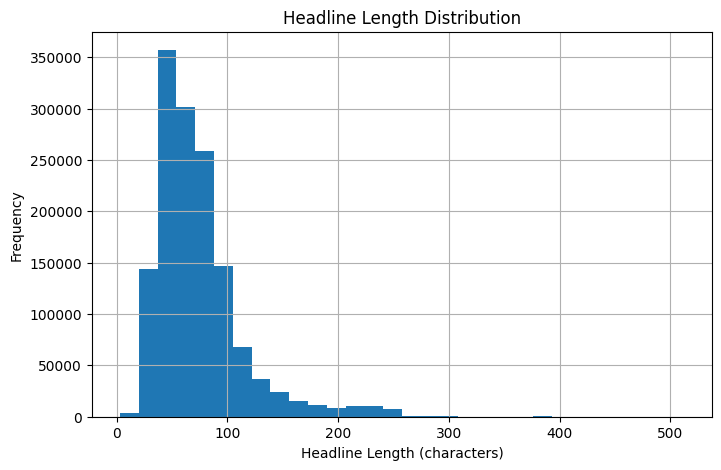


=== Articles per Publisher ===
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


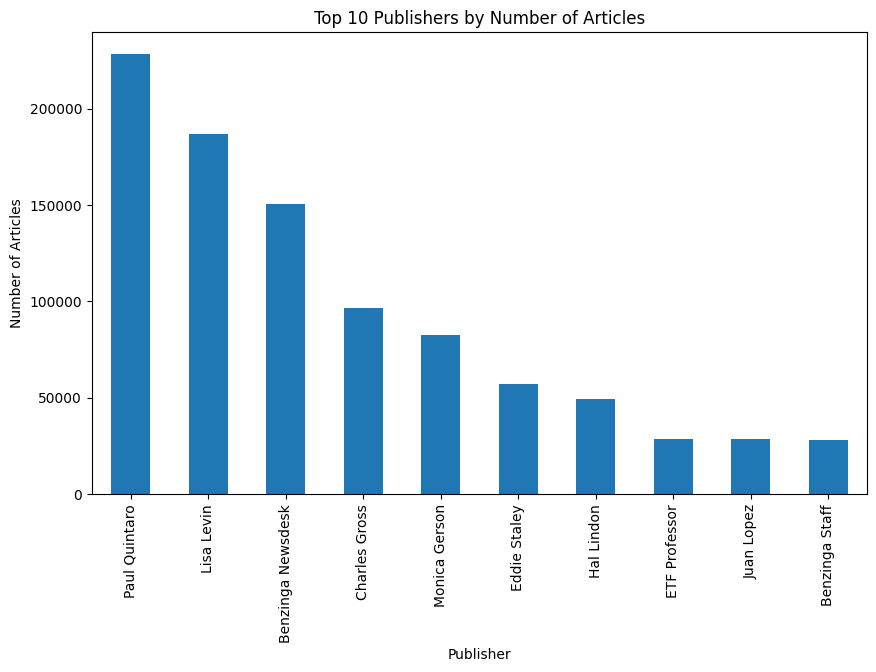


=== Articles per Day ===
date
2020-05-22    26
2020-05-26    28
2020-06-03    56
2020-06-05    62
dtype: int64


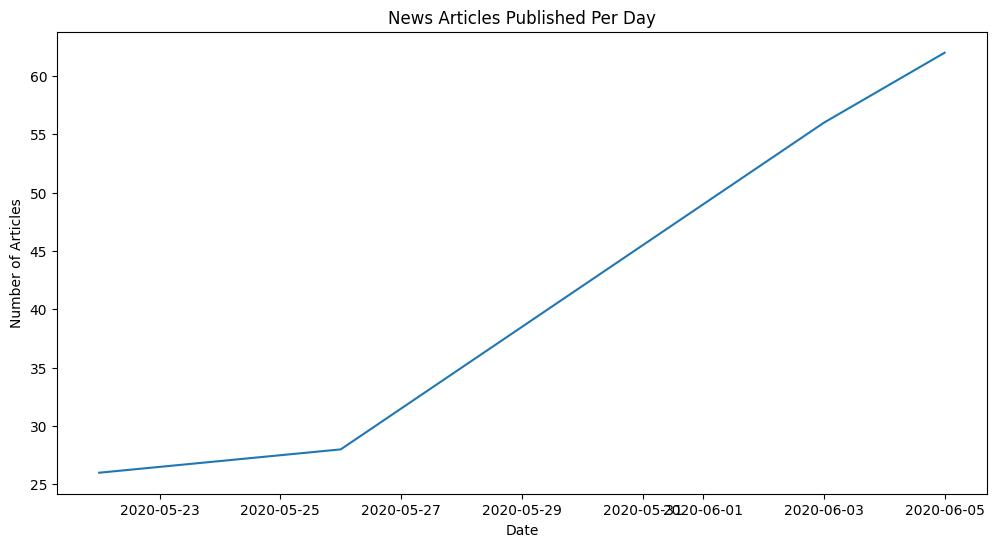

In [3]:
# eda_notebook.ipynb (or similar)
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))  


from src.historical import HistoricalStockAnalyzer
from src.news import NewsAnalyzer
from src.news import NewsAnalyzer
import os
import matplotlib.pyplot as plt

# stock files list
stock_files = [
    "../data/yfinance/AAPL_historical_data.csv",
    "../data/yfinance/AMZN_historical_data.csv",
    "../data/yfinance/GOOG_historical_data.csv",
    "../data/yfinance/META_historical_data.csv",

    "../data/yfinance/MSFT_historical_data.csv",
    
    "../data/yfinance/NVDA_historical_data.csv", 
    "../data/yfinance/TSLA_historical_data.csv",
]

# Run historical stock analysis summaries
for stock_file in stock_files:
    stock_name = os.path.basename(stock_file).split("_")[0]
    analyzer = HistoricalStockAnalyzer(stock_file)
    analyzer.load_data()
    print(f"=== {stock_name} Summary ===")
    print(analyzer.get_summary_stats())

# News analysis setup
news_file = "../data/raw_analyst_ratings.csv"
news_analyzer = NewsAnalyzer(news_file)
print("\n=== Headline Length Stats ===")
headline_stats = news_analyzer.basic_stats()
print(headline_stats)

# Plot histogram of headline lengths
news_analyzer.df["headline_length"] = news_analyzer.df["headline"].str.len()
plt.figure(figsize=(8,5))
news_analyzer.df["headline_length"].hist(bins=30)
plt.title("Headline Length Distribution")
plt.xlabel("Headline Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Count articles per publisher
print("\n=== Articles per Publisher ===")
publisher_counts = news_analyzer.articles_per_publisher()
print(publisher_counts.head(10))

# Plot top 10 publishers by article count
publisher_counts.head(10).plot(kind="bar", figsize=(10,6), title="Top 10 Publishers by Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.show()

# Analyze publication dates for trends
print("\n=== Articles per Day ===")
articles_per_day = news_analyzer.articles_per_day()
print(articles_per_day.head())

# Plot articles per day time series
plt.figure(figsize=(12,6))
articles_per_day.plot(title="News Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))  
from src.text_analysis import TextAnalyzer

# Example: Analyze your headline column
texts = news_analyzer.df["headline"].dropna().tolist()

analyzer = TextAnalyzer(texts)

# Extract top keywords
keywords = analyzer.extract_keywords(top_n=20)
print("Top Keywords:", keywords)

# Perform Topic Modeling
topics = analyzer.perform_topic_modeling(num_topics=5)
for t in topics:
    print(t)


Top Keywords: ['stocks', 'est', 'eps', 'reports', 'earnings', 'top', 'benzingas', 'market', 'shares', 'update', 'downgrades', 'sales', 'week', 'upgrades', 'buy', 'announces', 'raises', 'scheduled', 'price', 'session']
Topic #1: est, eps, reports, sales, sees, estimate, revenue, adj, analyst, earnings
Topic #2: update, shares, market, announces, movers, share, alert, option, biggest, markets
Topic #3: stocks, week, benzingas, earnings, session, moving, premarket, scheduled, watch, new
Topic #4: shares, trading, higher, companies, stocks, says, lower, stock, oil, industry
Topic #5: price, buy, raises, target, maintains, downgrades, initiates, neutral, upgrades, lowers


date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
dtype: int64


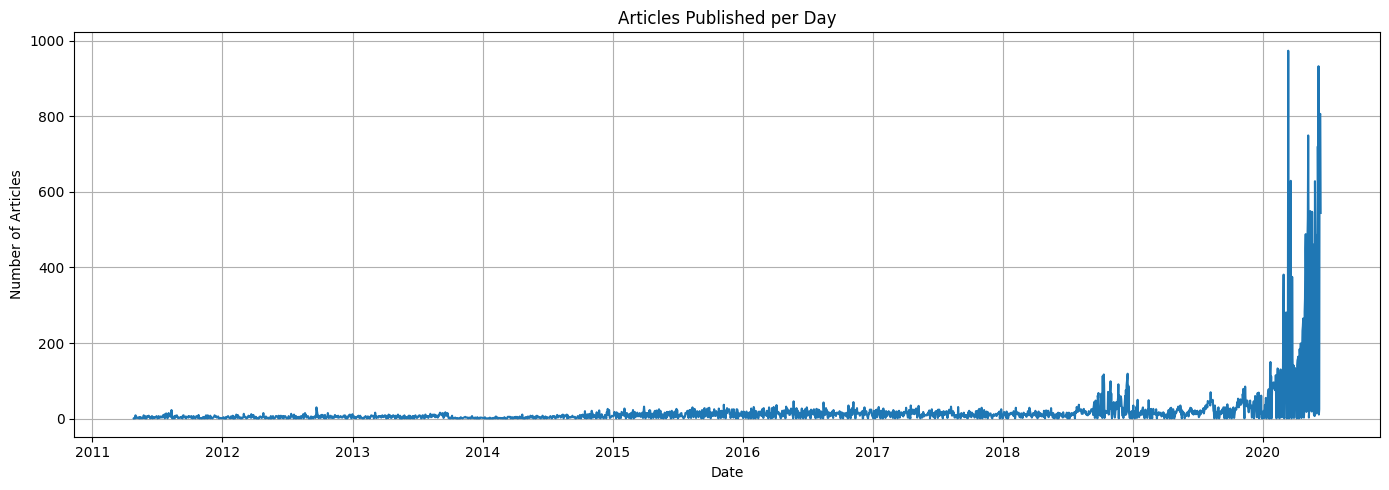

hour
0       67
1       14
2       57
3       93
4     1469
5     1829
6     2476
7     5033
8     5527
9     5965
10    7669
11    5701
12    5732
13    2710
14    2075
15    1612
16    3939
17    2800
18     704
19     227
20     131
21      82
22      48
23      27
Name: count, dtype: int64


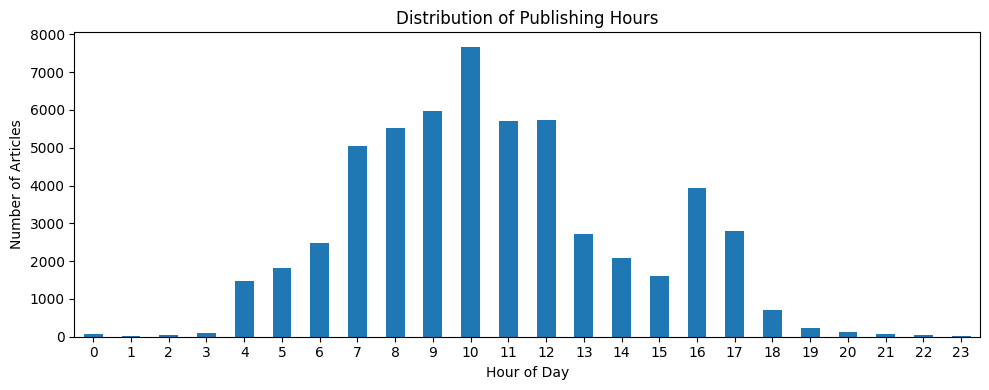

In [5]:

import pandas as pd
from src.time_series_analysis import TimeSeriesAnalyzer

file_path = "../data/raw_analyst_ratings.csv"  # Adjust to your path
df = pd.read_csv(file_path)

# Cell 3: Create Analyzer and check the date parsing
analyzer = TimeSeriesAnalyzer(df)

# Cell 4: View articles per day
daily_counts = analyzer.articles_per_day()
print(daily_counts.head())

# Cell 5: Plot articles per day
analyzer.plot_articles_per_day()

# Cell 6: Publishing hours
hour_dist = analyzer.publishing_hours_distribution()
print(hour_dist)

# Cell 7: Plot publishing hour distribution
analyzer.plot_publishing_hours_distribution()
